### INTERNSHIP STUDIO - ML INTERNSHIP

### NAME : LOGAPRIYA S

### Step 1: Import the Datasets and Libraries, Check Shape and Datatype

### Import Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.linear_model import LinearRegression
from sklearn.svm import SVR
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error
import keras
from keras.models import Sequential
from keras.layers import Dense
import joblib


### Load Dataset and Check Data Types

In [2]:
# Load the dataset
data = pd.read_csv('train.csv')

# Check the shape of the dataset
print(f"Shape of the dataset: {data.shape}")

# Check the datatypes of each column
print(data.dtypes)

# Display the first few rows
data.head()


Shape of the dataset: (14999, 9)
vidid        object
adview        int64
views        object
likes        object
dislikes     object
comment      object
published    object
duration     object
category     object
dtype: object


,vidid,adview,views,likes,dislikes,comment,published,duration,category
0,VID_18655,40,1031602,8523,363,1095,2016-09-14,PT7M37S,F
1,VID_14135,2,1707,56,2,6,2016-10-01,PT9M30S,D
2,VID_2187,1,2023,25,0,2,2016-07-02,PT2M16S,C
3,VID_23096,6,620860,777,161,153,2016-07-27,PT4M22S,H
4,VID_10175,1,666,1,0,0,2016-06-29,PT31S,D


### Step 3: Clean the Dataset by Removing Missing Values and Other Things

### Remove Missing Values

In [3]:
# Check for missing values
print(data.isnull().sum())

# Drop rows with missing values
data = data.dropna()


vidid        0
adview       0
views        0
likes        0
dislikes     0
comment      0
published    0
duration     0
category     0
dtype: int64


### Convert Columns to Numeric and Handle Non-Numeric Entries

In [4]:
# Function to convert to numeric and handle errors by setting invalid parsing as NaN
def to_numeric(column):
    return pd.to_numeric(column, errors='coerce')

# Apply to_numeric function to relevant columns
data['views'] = to_numeric(data['views'])
data['likes'] = to_numeric(data['likes'])
data['dislikes'] = to_numeric(data['dislikes'])
data['comment'] = to_numeric(data['comment'])

# Drop rows with NaN values created from non-numeric conversions
data = data.dropna()


### Transform duration to Numerical

In [5]:
import re

# Function to convert ISO 8601 duration format to seconds
def convert_duration(duration):
    match = re.match('PT(?:(\d+)H)?(?:(\d+)M)?(?:(\d+)S)?', duration)
    if match:
        hours = int(match.group(1)) if match.group(1) else 0
        minutes = int(match.group(2)) if match.group(2) else 0
        seconds = int(match.group(3)) if match.group(3) else 0
        total_seconds = hours * 3600 + minutes * 60 + seconds
        return total_seconds
    else:
        return 0

data['duration'] = data['duration'].apply(convert_duration)


### Step 4: Transform Attributes into Numerical Values

### Encode Categorical Variables

In [6]:
# Encode 'category' using LabelEncoder
label_encoder = LabelEncoder()
data['category'] = label_encoder.fit_transform(data['category'])

# Convert 'published' to datetime
data['published'] = pd.to_datetime(data['published'])

# Extract useful date features
data['published_year'] = data['published'].dt.year
data['published_month'] = data['published'].dt.month
data['published_day'] = data['published'].dt.day

# Drop the original 'published' column
data = data.drop('published', axis=1)


### Step 2: Visualise the Dataset Using Plotting

### Heatmap for Correlation

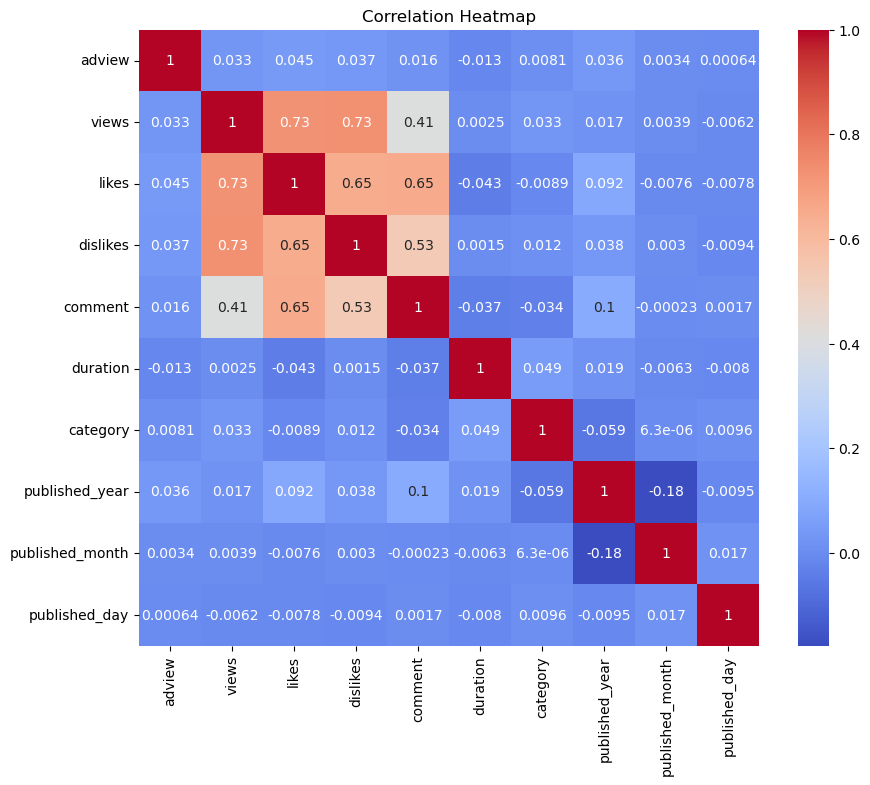

In [7]:
# Select only numeric columns for correlation
numeric_cols = data.select_dtypes(include=[np.number]).columns

plt.figure(figsize=(10, 8))
sns.heatmap(data[numeric_cols].corr(), annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()


### Distribution Plots

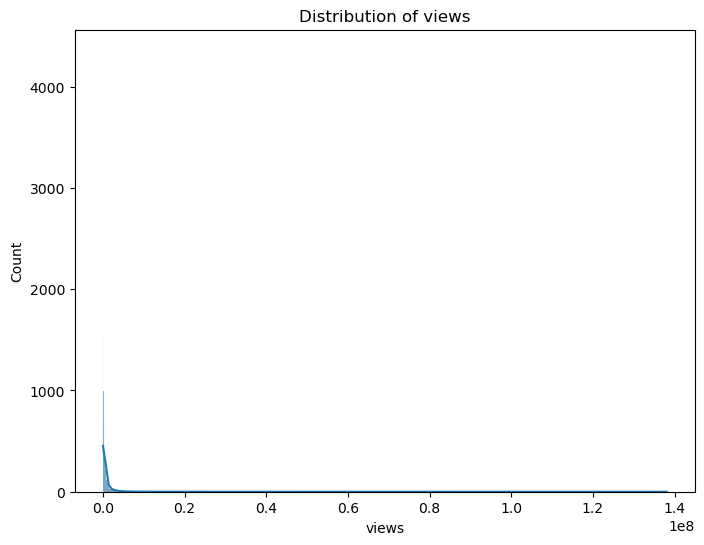

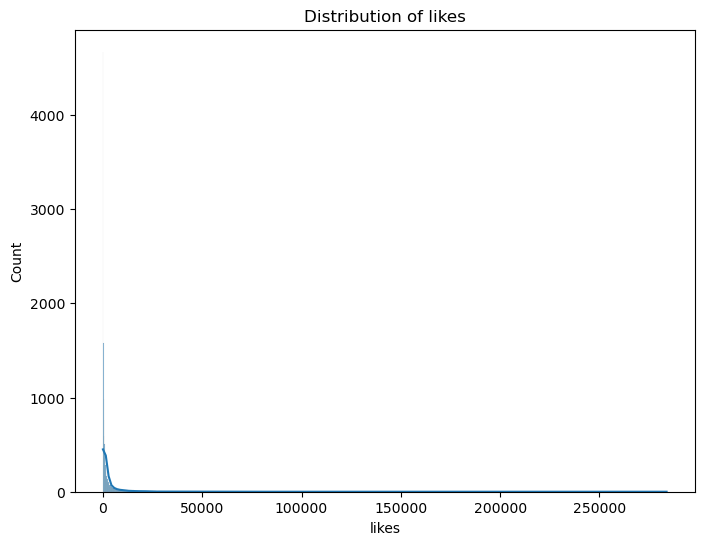

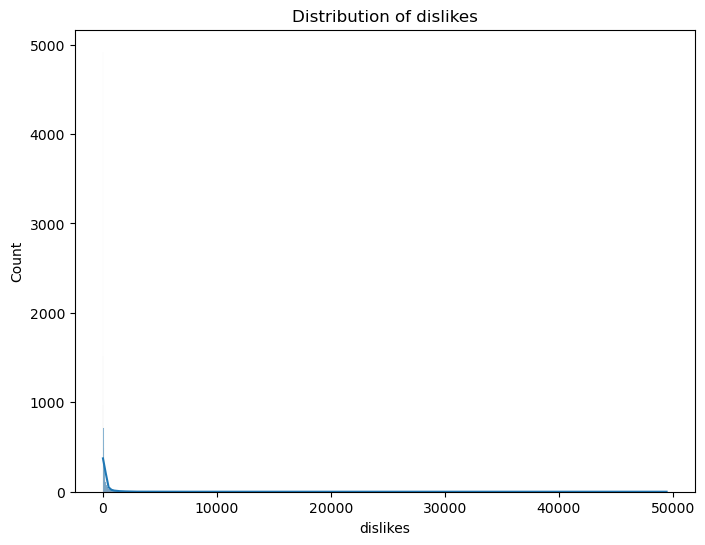

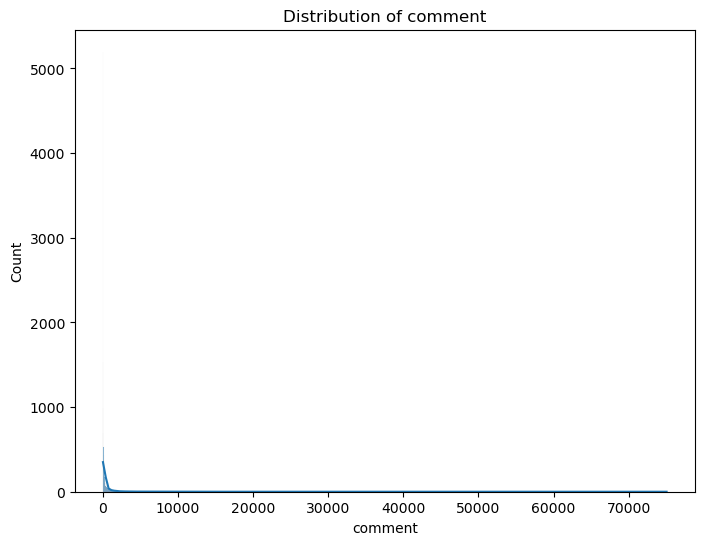

In [8]:
# Plot distributions for numerical attributes
numerical_columns = ['views', 'likes', 'dislikes', 'comment']

for col in numerical_columns:
    plt.figure(figsize=(8, 6))
    sns.histplot(data[col], kde=True)
    plt.title(f'Distribution of {col}')
    plt.show()


### Step 5: Normalize Data and Split into Training, Validation, and Test Sets

### Normalize the Data

In [9]:
# Separate features and target variable
X = data.drop(['vidid', 'adview'], axis=1)
y = data['adview']

# Normalize the data
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)


### Split the Data

In [10]:
# Split data into training, validation, and test sets
X_train, X_temp, y_train, y_temp = train_test_split(X_scaled, y, test_size=0.3, random_state=42)
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=42)


### Step 6: Train Linear Regression and Support Vector Regressor

### Linear Regression

In [11]:
# Linear Regression
lr = LinearRegression()
lr.fit(X_train, y_train)
y_pred_lr = lr.predict(X_val)

# Calculate errors
mse_lr = mean_squared_error(y_val, y_pred_lr)
mae_lr = mean_absolute_error(y_val, y_pred_lr)
print(f'Linear Regression MSE: {mse_lr}, MAE: {mae_lr}')


Linear Regression MSE: 1005451394.1619406, MAE: 3621.7351949983417


### Support Vector Regressor

In [12]:
# Support Vector Regressor
svr = SVR()
svr.fit(X_train, y_train)
y_pred_svr = svr.predict(X_val)

# Calculate errors
mse_svr = mean_squared_error(y_val, y_pred_svr)
mae_svr = mean_absolute_error(y_val, y_pred_svr)
print(f'SVR MSE: {mse_svr}, MAE: {mae_svr}')


SVR MSE: 1008845222.0932884, MAE: 1744.853707989456


### Step 7: Train Decision Tree Regressor and Random Forest Regressor

### Decision Tree Regressor

In [13]:
# Decision Tree Regressor
dt = DecisionTreeRegressor()
dt.fit(X_train, y_train)
y_pred_dt = dt.predict(X_val)

# Calculate errors
mse_dt = mean_squared_error(y_val, y_pred_dt)
mae_dt = mean_absolute_error(y_val, y_pred_dt)
print(f'Decision Tree MSE: {mse_dt}, MAE: {mae_dt}')


Decision Tree MSE: 2624979501.56102, MAE: 4059.3870673952642


### Random Forest Regressor

In [14]:
# Random Forest Regressor
rf = RandomForestRegressor()
rf.fit(X_train, y_train)
y_pred_rf = rf.predict(X_val)

# Calculate errors
mse_rf = mean_squared_error(y_val, y_pred_rf)
mae_rf = mean_absolute_error(y_val, y_pred_rf)
print(f'Random Forest MSE: {mse_rf}, MAE: {mae_rf}')


Random Forest MSE: 851553953.2312356, MAE: 2994.4189207650275


### Step 8: Build and Train an Artificial Neural Network

### Define and Compile the Model

In [15]:
# Build the ANN
ann = Sequential()
ann.add(Dense(units=128, activation='relu', input_dim=X_train.shape[1]))
ann.add(Dense(units=64, activation='relu'))
ann.add(Dense(units=1))

# Compile the ANN
ann.compile(optimizer='adam', loss='mean_squared_error')


C:\Users\slogp\anaconda3\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


### Train the Model

In [16]:
# Train the ANN
ann.fit(X_train, y_train, epochs=100, batch_size=32, validation_data=(X_val, y_val))


Epoch 1/100
321/321 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - loss: 867053632.0000 - val_loss: 1008730368.0000
Epoch 2/100
321/321 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 962188544.0000 - val_loss: 1007826944.0000
Epoch 3/100
321/321 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 752373760.0000 - val_loss: 1006066880.0000
Epoch 4/100
321/321 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 1356450048.0000 - val_loss: 1004296576.0000
Epoch 5/100
321/321 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 584666944.0000 - val_loss: 1003220096.0000
Epoch 6/100
321/321 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 375226176.0000 - val_loss: 1002535360.0000
Epoch 7/100
321/321 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 742089856.0000 - val_loss: 1002118272.0000
Epoch 8/100
321/321 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 448135776.0000 - val_loss: 1001852160.0000
Epoch 9/100
321/321 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 1161064448.0000 - val_loss: 1001723520.0000
Epoch 10/100
321/321 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 

321/321 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 866853440.0000 - val_loss: 999222144.0000
Epoch 61/100
321/321 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 402412064.0000 - val_loss: 999186240.0000
Epoch 62/100
321/321 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 586409280.0000 - val_loss: 999165696.0000
Epoch 63/100
321/321 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 642882688.0000 - val_loss: 999101760.0000
Epoch 64/100
321/321 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 766312448.0000 - val_loss: 999065024.0000
Epoch 65/100
321/321 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 532017504.0000 - val_loss: 999027392.0000
Epoch 66/100
321/321 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 669174208.0000 - val_loss: 998997824.0000
Epoch 67/100
321/321 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - loss: 429154112.0000 - val_loss: 998919488.0000
Epoch 68/100
321/321 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 1047476928.0000 - val_loss: 998852672.0000
Epoch 69/100
321/321 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 499715968.0000

### Step 10: Save the Best Model and Predict on the Test Set

### Save the Model

In [17]:
# Save the best model, assuming Random Forest was the best model
joblib.dump(rf, 'best_model_rf.pkl')


['best_model_rf.pkl']

### Load the Model and Predict on Test Set

In [18]:
# Load the saved model
best_model = joblib.load('best_model_rf.pkl')

# Predict on the test set
y_pred_test = best_model.predict(X_test)

# Calculate test errors
mse_test = mean_squared_error(y_test, y_pred_test)
mae_test = mean_absolute_error(y_test, y_pred_test)
print(f'Test MSE: {mse_test}, MAE: {mae_test}')


Test MSE: 13957245401.567562, MAE: 5344.071366120218
